# ライブラリのインポート

In [3]:
import numpy as np
import scipy.stats  as ss
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

# データ読み込み

In [10]:
bmi = pd.read_csv("data/sysbp.csv", comment="#")
bmi["SEX"].unique() #　カテゴリ変数の値を確認

array(['Male', 'Female'], dtype=object)

# カテゴリ変数をダミー変数に変換

In [9]:
data = pd.get_dummies(bmi, drop_first=True)
print(data.head())

     BMI   AGE  BPMEDS  SYSBP  SEX_Male
0  26.97  39.0     0.0  106.0         1
1  28.73  46.0     0.0  121.0         0
2  25.34  48.0     0.0  127.5         1
3  28.58  61.0     0.0  150.0         0
4  23.10  46.0     0.0  130.0         0


# 欠損値検査関数の定義

In [6]:
def lack_table(df): 
    import pandas
    '''
    This function is caliculation of lack values from raw data.
    
    Library: pandas, numpy
    
    params
    ---------
    df : DataFrame
            raw data set.
    
    Returns
    --------
    lack_table_ren_columns: pandas.DataFrame
                            Return results lack of raw data.
    '''Z
    null_val = df.isnull().sum()
    percent = 100 * df.isnull().sum()/len(df)
    lack_table = pandas.concat([null_val, percent], axis=1)
    lack_table_ren_columns = lack_table.rename(
    columns = {0 : '欠損数', 1 : '%'})
    return lack_table_ren_columns

#  欠損値検査

In [23]:
print(lack_table(data))

          欠損数    %
BMI         0  0.0
AGE         0  0.0
BPMEDS      0  0.0
SYSBP       0  0.0
SEX_Male    0  0.0


# 欠損値処理

In [30]:
data["BPMEDS"] = data["BPMEDS"].fillna(0).astype(float)
data["SYSBP"] = data["SYSBP"].fillna(data["SYSBP"].median())

In [25]:
print(lack_table(data))

          欠損数    %
BMI         0  0.0
AGE         0  0.0
BPMEDS      0  0.0
SYSBP       0  0.0
SEX_Male    0  0.0


# 散布図作成

/Users/kozuzu931/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  after removing the cwd from sys.path.


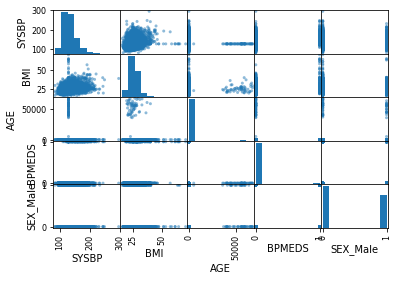

In [32]:
X = data[["BMI", "AGE", "BPMEDS", "SEX_Male"]]
y = data["SYSBP"]

pd.scatter_matrix(data[["SYSBP", "BMI", "AGE", "BPMEDS", "SEX_Male"]])
plt.show()

# 重回帰分析(sklearn)

In [34]:
reg = linear_model.HuberRegressor()


reg.fit(X, y)

#　回帰係数 regression coefficient
print("回帰係数(regression coefficinet)")
print(pd.DataFrame({"Name":X.columns, "Coefficients":reg.coef_}))
# 切片 intercept
print("切片 (intercept)", reg.intercept_)

回帰係数(regression coefficinet)
       Name  Coefficients
0       BMI      1.426023
1       AGE      0.000005
2    BPMEDS     19.873242
3  SEX_Male     -1.337752
切片 (intercept) 92.75457795762279
